In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rnd_n_gen(u0, a, c, m, iter):
    nums = []
    nums.append(u0)
    for i in range(iter):
        u = (a * u0 + c) % m
        nums.append(u)
        u0 = u
    return nums

rnd_n_gen(5, 4, 1, 15, 20)

[5, 6, 10, 11, 0, 1, 5, 6, 10, 11, 0, 1, 5, 6, 10, 11, 0, 1, 5, 6, 10]

If we happen to go with 
$$
u_{i} = (au_{i+j} + cu_{i+k})\text{mod}\,m
$$
we would need a seed sequence, as opposed to a single seed value, as given for the example of prior random number generator.

In [3]:
def rnd_n_gen_2(seed_seq, a, c, m, iter, j, k):
    nums = []
    for num in seed_seq:
        nums.append(num)
    for i in range(iter):
        u = (a * nums[i + j] + c * nums[i + k]) % m
        nums.append(u)

    return nums

rnd_n_gen_2([1,5,2,7,2,10], 4, 19, 20, 20, 2, 3)

[1,
 5,
 2,
 7,
 2,
 10,
 1,
 6,
 18,
 19,
 18,
 6,
 13,
 18,
 6,
 11,
 14,
 6,
 13,
 10,
 10,
 11,
 2,
 10,
 9,
 2]

If we might happen to generate random floats, in this case between 0 and 1, we can actually make use of the prior functions, and have a float given by
$$
r_{i} = u_{i}/m
$$

In [4]:
np.array(rnd_n_gen(5, 4, 1, 15, 20))/15

array([0.33333333, 0.4       , 0.66666667, 0.73333333, 0.        ,
       0.06666667, 0.33333333, 0.4       , 0.66666667, 0.73333333,
       0.        , 0.06666667, 0.33333333, 0.4       , 0.66666667,
       0.73333333, 0.        , 0.06666667, 0.33333333, 0.4       ,
       0.66666667])

We can eventually extend this to any interval $[a,b[$, by having
$$
x_{i} = a + (b-a)r_{i}
$$

In [5]:
a = 1
b = np.pi
nums_transformed = []
for num in np.array(rnd_n_gen(5, 21, 2, 40, 40))/15:
    nums_transformed.append(a + (b - a)*num)

nums_transformed

[1.7138642178632644,
 4.854866776461628,
 2.284955592153876,
 5.42595815075224,
 2.856046966444487,
 5.997049525042851,
 3.4271383407350986,
 6.5681408993334625,
 3.99822971502571,
 1.4283185307179587,
 4.569321089316322,
 1.9994099050085703,
 5.140412463606934,
 2.5705012792991813,
 5.711503837897546,
 3.141592653589793,
 6.2825952121881565,
 3.7126840278804045,
 1.142772843572653,
 4.283775402171017,
 1.7138642178632644,
 4.854866776461628,
 2.284955592153876,
 5.42595815075224,
 2.856046966444487,
 5.997049525042851,
 3.4271383407350986,
 6.5681408993334625,
 3.99822971502571,
 1.4283185307179587,
 4.569321089316322,
 1.9994099050085703,
 5.140412463606934,
 2.5705012792991813,
 5.711503837897546,
 3.141592653589793,
 6.2825952121881565,
 3.7126840278804045,
 1.142772843572653,
 4.283775402171017,
 1.7138642178632644]

Good number generators should have as large a period as possible, and should not have noticeable correlations.

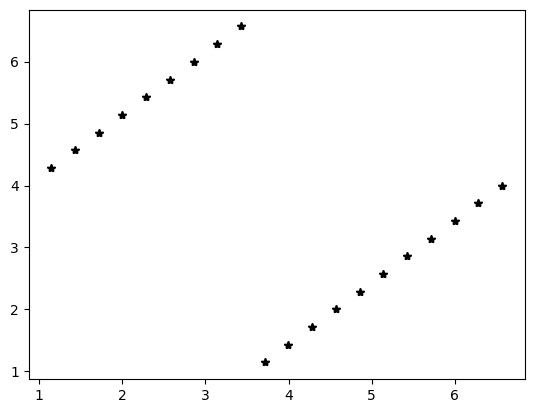

In [6]:
num_pairs = [(nums_transformed[i], nums_transformed[i + 1]) for i in range(len(nums_transformed) - 1)]
x, y = zip(*num_pairs)
plt.plot(x, y, "k*")

This would be an example of a bad RNG, as we can clearly notice correlations.

In [7]:
np.histogram(nums_transformed) # Here we also see that these vals are equidistributed for the major part

(array([4, 5, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([1.14277284, 1.68530965, 2.22784645, 2.77038326, 3.31292007,
        3.85545687, 4.39799368, 4.94053048, 5.48306729, 6.02560409,
        6.5681409 ]))

In [8]:
import random
random.seed(42)

In [9]:
gaussian = np.random.normal(-1, 1, (50,50))
np.histogram(gaussian)

(array([ 15,  35, 158, 406, 667, 623, 390, 165,  36,   5]),
 array([-4.42308129, -3.74247252, -3.06186376, -2.38125499, -1.70064623,
        -1.02003747, -0.3394287 ,  0.34118006,  1.02178883,  1.70239759,
         2.38300636]))

In [10]:
uniform = np.random.uniform(-1, 1, (50,50))
np.histogram(uniform)

(array([241, 265, 236, 272, 211, 272, 244, 244, 251, 264]),
 array([-9.98835638e-01, -7.99122682e-01, -5.99409725e-01, -3.99696768e-01,
        -1.99983812e-01, -2.70854950e-04,  1.99442102e-01,  3.99155058e-01,
         5.98868015e-01,  7.98580972e-01,  9.98293929e-01]))

We have that
$$
\langle f(x) \rangle = \int_{- \infty}^{+ \infty} p(x) f(x) dx
$$
such that if the probability density function within an interval a and b is to be uniform, we have that $p(x) = 1/(b-a)$, such that
$$
\langle f(x) \rangle = \frac{1}{b-a}\int_{a}^{b} f(x) dx
$$
We could also see that if we want to obtain an approximation for the integral $\int_{a}^{b} f(x) dx$, we could sample $N$ random points within the respective interval, and evaluating the respective function $f(x)$ at those. As such, we have
$$
\int_{a}^{b} f(x) dx \approx \frac{b-a}{N}\sum_{i}^{N - 1}f(x_{i})
$$


In [11]:
from scipy.integrate import quad
def int_approx(f, a, b, N):
    val = 0
    for i in range(N):
        val += f(random.uniform(a,b))

    return (b-a) * val / N

print(int_approx(lambda x: np.sin(x) + x**2, -np.pi + np.e, np.pi, 1000))
print(quad(lambda x: np.sin(x) + x**2, -np.pi + np.e, np.pi)[0])

12.717057657300312
12.27244412039372


We can also develop this approach more and include the std of the respective integral. As such, we would have
$$
\int_{a}^{b} f(x) dx \approx \frac{b-a}{N}\sum_{i}^{N - 1}f(x_{i}) \pm \frac{b-a}{\sqrt{N - 1}}\sqrt{\frac{1}{N}\sum_{i = 0}^{N-1}f^{2}(x_{i}) - \left(\frac{1}{N}\sum_{i = 0}^{N-1}f(x_{i})\right)^{2}}
$$

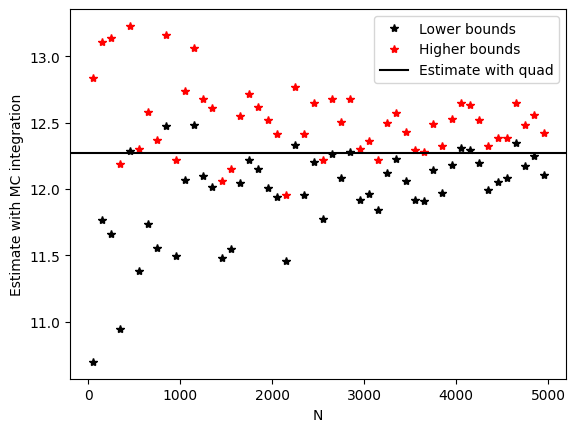

In [12]:
def MC_integ(f, a, b, N):
    fval1 = 0 #f(x)
    fval2 = 0 #f^2(x)
    for i in range(N):
        """
        Here regardless from what dist we sample (in this case uniform),
        the sample mean is going to obey a Gaussian dist, as N increases
        """
        fval1 += f(random.uniform(a,b))
        fval2 += f(random.uniform(a,b))**2
    
    lower_bound = ((b-a) * fval1 / N) - ((b-a) / np.sqrt(N)) * np.sqrt((1/N) * fval2 - ((1/N) * fval1)**2)
    higher_bound = ((b-a) * fval1 / N) + ((b-a) / np.sqrt(N)) * np.sqrt((1/N) * fval2 - ((1/N) * fval1)**2)
    return [lower_bound, higher_bound]


vals = []
for k in np.arange(50, 5000, 100):
    vals.append(MC_integ(lambda x: np.sin(x) + x**2, -np.pi + np.e, np.pi, k))

lower_bounds, higher_bounds = zip(*vals)
plt.plot(np.arange(50, 5000, 100), lower_bounds, "k*", label = "Lower bounds")
plt.plot(np.arange(50, 5000, 100), higher_bounds, "r*", label = "Higher bounds")
plt.axhline(quad(lambda x: np.sin(x) + x**2, -np.pi + np.e, np.pi)[0], color = "k", label = "Estimate with quad")
plt.xlabel("N")
plt.ylabel("Estimate with MC integration")
plt.legend()